In [1]:
import sys
sys.path.insert(0, '../')
import ccob_qe_analysis as qe
import ccob_utils as u
import os
import glob
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
config = u.load_ccob_config("../ccob_config_MR.yaml")

In [3]:
import ccob_beam as beam

#### Choose the LED used to reconstruct the beam among [nm960, nm850, nm750, red, blue, uv]

In [4]:
config['tmp_dir']='/home/combet/tmp_MR/12x12/'
config['led_name']='red'


In [5]:
# Path to the data. Here 6593D is the run number.
# R22, baffle off
ref_raft = 'R22' # raft  
ref_slot = 'S11' # ccd in ref_raft to use for the beam reconstruction (we'll use a buch of pixels in each amp of that CCD)
baffle = 'off'
dirlist=glob.glob('/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_stage-test/LCA-10134_Cryostat/LCA-10134_Cryostat-0001/6680D/BOT_acq/v0/46569/ccob_'+config['led_name']+'*')

# R22, baffle on
# ref_raft = 'R22' # raft  
# ref_slot = 'S11' # ccd in ref_raft to use for the beam reconstruction (we'll use a buch of pixels in each amp of that CCD)
# baffle = 'on'
# dirlist1=glob.glob('/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_stage-test/LCA-10134_Cryostat/LCA-10134_Cryostat-0001/6681D/BOT_acq/v0/46576/ccob_'+config['led_name']+'*')
# dirlist2=glob.glob('/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_stage-test/LCA-10134_Cryostat/LCA-10134_Cryostat-0001/6682D/BOT_acq/v0/46581/ccob_'+config['led_name']+'*')
# dirlist=sorted(dirlist1+dirlist2)

# R10, baffle off
# ref_raft = 'R10' # raft  
# ref_slot = 'S20' # ccd in ref_raft to use for the beam reconstruction (we'll use a buch of pixels in each amp of that CCD)
# baffle = 'off'
# dirlist=glob.glob('/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_stage-test/LCA-10134_Cryostat/LCA-10134_Cryostat-0001/6678D/BOT_acq/v0/46557/ccob_'+config['led_name']+'*')

# R10, baffle on
# ref_raft = 'R10' # raft  
# ref_slot = 'S11' # ccd in ref_raft to use for the beam reconstruction (we'll use a buch of pixels in each amp of that CCD)
# baffle = 'on'
# dirlist=glob.glob('/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_stage-test/LCA-10134_Cryostat/LCA-10134_Cryostat-0001/6683D/BOT_acq/v0/46587/ccob_'+config['led_name']+'*')

In [6]:
len(dirlist)

144

### Fill in beam object with raw data, using the central bunch of pixels in each channel

- ref_raft: either 'R10' (same as previous data) or 'R22' (central raft)
- ref_ccd: from S00 to S22 (S11 is the central CCD of the raft). Choose the CCD where the centre of the scan is located

In [7]:
b = beam.CcobBeam(config)

In [10]:
for i in np.arange(12): # that's just to allow saving the data at intermediate steps for the 12x12 scan
    start = i*12
    end = (i+1)*12
    b.read_multibunch(dirlist=dirlist[start:end], outdir = config['tmp_dir'], ref_raft=ref_raft, ref_slot=ref_slot)
    b.save(os.path.join(config['tmp_dir'],'beam_object_'+ref_raft+'_'+ref_slot+'_'+b.config['led_name']+'_'+baffle+'.pkl'))

here
here
here


AttributeError: module 'lsst.pex.exceptions' has no attribute 'LSST_RUNTIME_EXCEPTION'

In [11]:
print(b.raw_data['xarr'][135],b.raw_data['yarr'][135],b.raw_data['val'][12][135])

36.3 -16.5 52829.773


### Load the beam object created above...

In [8]:
import pickle as pkl
config['tmp_dir']='/home/combet/tmp_MR/12x12/'
ref_raft='R10'
ref_slot='S20'
baffle='on'
#led = b.config['led_name']
led = 'nm850'
bb = pkl.load(open(config['tmp_dir']+'beam_object_'+ref_raft+'_'+ref_slot+'_'+led+'_'+baffle+'.pkl','rb'))

### ... and plot the raw beam reconstruction

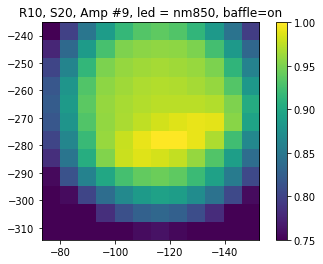

In [9]:
amp=9 # 1-16, select the channel used for the reconstruction

binsize = (max(bb.raw_data['yarr'])-min(bb.raw_data['yarr']))/11
extent = [max(bb.raw_data['xarr'])+binsize/2,
          min(bb.raw_data['xarr'])-binsize/2,
          min(bb.raw_data['yarr'])-binsize/2, 
          max(bb.raw_data['yarr'])+binsize/2]

tmp = np.asarray(bb.raw_data['val'][amp])/np.asarray(bb.raw_data['pd_value']) # correct for the control photodiode value
tmp = tmp / max(tmp) # normalise to the max

plt.imshow(np.flip(np.reshape(tmp,(12,12), order='F'),axis=1), extent=extent, origin='lower', vmin=0.75)
plt.title(ref_raft+', '+ref_slot+', Amp #'+str(amp)+', led = '+led+', baffle='+baffle)
plt.colorbar()
basename = ref_raft+'_'+ref_slot+'_'+str(amp)+'_'+baffle
plt.savefig(config['tmp_dir']+'/beam_'+basename+'_'+led+'.png')


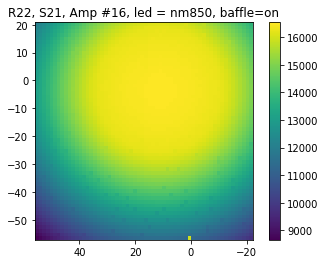

In [29]:
config['tmp_dir']='/home/combet/tmp_MR/60x60/'
ref_raft='R22'
ref_slot='S21'
baffle='on'
#led = b.config['led_name']
led = 'nm850'
bb = pkl.load(open(config['tmp_dir']+'beam_object_'+ref_raft+'_'+ref_slot+'_'+led+'_'+baffle+'.pkl','rb'))

amp=16 # 1-16, select the channel used for the reconstruction

binsize = (max(bb.raw_data['yarr'])-min(bb.raw_data['yarr']))/59
extent = [max(bb.raw_data['xarr'])+binsize/2,
          min(bb.raw_data['xarr'])-binsize/2,
          min(bb.raw_data['yarr'])-binsize/2, 
          max(bb.raw_data['yarr'])+binsize/2]

tmp = np.asarray(bb.raw_data['val'][amp])/np.asarray(bb.raw_data['pd_value']) # correct for the control photodiode value
#tmp = tmp / max(tmp) # normalise to the max

plt.imshow(np.flip(np.reshape(tmp,(60,60), order='F'),axis=1), extent=extent, origin='lower')
plt.title(ref_raft+', '+ref_slot+', Amp #'+str(amp)+', led = '+led+', baffle='+baffle)
plt.colorbar()
basename = ref_raft+'_'+ref_slot+'_'+str(amp)+'_'+baffle
plt.savefig(config['tmp_dir']+'/beam_'+basename+'_'+led+'.png')

### I suspect that for the beam reconstruction for scan centered over R22, the above will fail 

The y-ordering of the data will most likely be wrong (I expect a clear discontinuity in the image above). I'll correct it when I get back. So below, I use `tricontourf` which does not require any ordering of the data (so it should be fine even for the R22 scan). It's not really raw data anymore as `tricontourf` does some interpolation. Blue crosses locate where the data was taken (corresponding to the pixels in the image above).

NB: x-axis increases to the right here, hence the reversal w.r.t the previous plot.


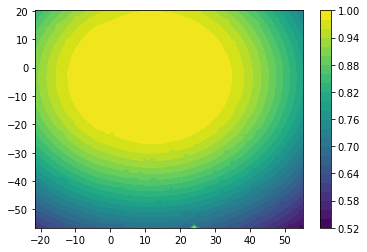

In [70]:
#plt.plot(bb.raw_data['xarr'],bb.raw_data['yarr'], 'b+ ')
plt.tricontourf(bb.raw_data['xarr'],bb.raw_data['yarr'],tmp, 30, aspect='equal')
plt.colorbar()

In [5]:
import pickle as pkl
config['tmp_dir']='/home/combet/tmp_MR/12x12/'
rafts = ['R22', 'R10']
slots = ['S10','S11','S12','S20','S21','S22']
amps = np.arange(1,17)
baffle='on'
#led = b.config['led_name']
led = 'nm960'

for ref_raft in rafts:
    for ref_slot in slots:
        bb = pkl.load(open(config['tmp_dir']+'beam_object_'+ref_raft+'_'+ref_slot+'_'+led+'_'+baffle+'.pkl','rb'))
        for amp in amps:
            binsize = (max(bb.raw_data['yarr'])-min(bb.raw_data['yarr']))/11
            extent = [max(bb.raw_data['xarr'])+binsize/2,
                      min(bb.raw_data['xarr'])-binsize/2,
                      min(bb.raw_data['yarr'])-binsize/2, 
                      max(bb.raw_data['yarr'])+binsize/2]

            tmp = np.asarray(bb.raw_data['val'][amp])/np.asarray(bb.raw_data['pd_value']) # correct for the control photodiode value
            tmp = tmp / max(tmp) # normalise to the max
            
            plt.imshow(np.flip(np.reshape(tmp,(12,12), order='F'),axis=1), extent=extent, origin='lower', vmin=0.75)
            plt.title(ref_raft+', '+ref_slot+', Amp #'+str(amp)+', led = '+led+', baffle='+baffle)
            plt.colorbar()
            basename = ref_raft+'_'+ref_slot+'_'+str(amp)+'_'+baffle
            plt.savefig(config['tmp_dir']+'/beam_'+basename+'_'+led+'.png')
            plt.close()

In [9]:
import pickle as pkl
config['tmp_dir']='/home/combet/tmp_MR/12x12/'
ref_raft = 'R22'
leds = ['nm960', 'nm850', 'nm750', 'red', 'blue', 'uv']
ref_slot = 'S11'
amp = 1
baffle='on'
#led = b.config['led_name']
bb_ref = pkl.load(open(config['tmp_dir']+'beam_object_'+ref_raft+'_'+ref_slot+'_red_'+baffle+'.pkl','rb'))
tmp_ref = np.asarray(bb_ref.raw_data['val'][amp])/np.asarray(bb_ref.raw_data['pd_value']) # correct for the control photodiode value
tmp_ref = tmp_ref / max(tmp_ref)

for led in leds:
    bb = pkl.load(open(config['tmp_dir']+'beam_object_'+ref_raft+'_'+ref_slot+'_'+led+'_'+baffle+'.pkl','rb'))
       
    binsize = (max(bb.raw_data['yarr'])-min(bb.raw_data['yarr']))/11
    extent = [max(bb.raw_data['xarr'])+binsize/2,
              min(bb.raw_data['xarr'])-binsize/2,
              min(bb.raw_data['yarr'])-binsize/2, 
              max(bb.raw_data['yarr'])+binsize/2]

    tmp = np.asarray(bb.raw_data['val'][amp])/np.asarray(bb.raw_data['pd_value']) # correct for the control photodiode value
    tmp = tmp / max(tmp) # normalise to the max

    plt.imshow(np.flip(np.reshape(tmp/tmp_ref,(12,12), order='F'),axis=1), extent=extent, origin='lower')
    plt.title(ref_raft+', '+ref_slot+', Amp #'+str(amp)+', led = '+led+', baffle='+baffle)
    plt.colorbar()
    basename = ref_raft+'_'+ref_slot+'_'+str(amp)+'_'+baffle
    plt.savefig(config['tmp_dir']+'/beam_'+basename+'_'+led+'_ratio_to_red.png')
    plt.close()